<a href="https://colab.research.google.com/github/sRajdeep617/Cyberbullying-Tweets-Classification/blob/main/Cyberbullying_Tweets_Classificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/Cyberbullying Tweets Classification/cyberbullying_tweets.csv')
df.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

Let's see all the labels

In [4]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [5]:
df = df.rename(columns={"tweet_text":"text","cyberbullying_type":"sentiment"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       47692 non-null  object
 1   sentiment  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


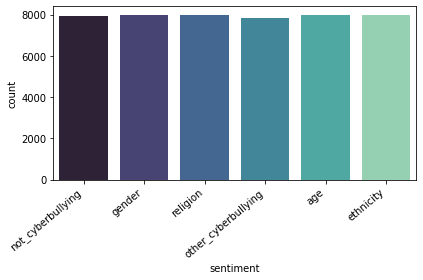

In [6]:
axes = sns.countplot(x = "sentiment", data = df, palette = 'mako')

axes.set_xticklabels(axes.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()
plt.show()

Checking for null

In [7]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

# Data Cleaning


In [8]:
# function for cleaning tweets

def clean_tweets(df, field):
  df[field] = df[field].str.replace(r'http\S+', " ")
  df[field] = df[field].str.replace(r'http+', " ")
  df[field] = df[field].str.replace(r'@', "at")
  df[field] = df[field].str.replace('#[A-Za-z0-9]+', " ")
  df[field] = df[field].str.replace(r"[^A-Za-z(),!?@\'\"_\n]", " ")
  df[field] = df[field].str.lower()

  return df  

In [9]:
clean_tweets(df, "text")

text          sentiment
0        in other words  , your food was crapilicious!    not_cyberbullying
1                   why is   so white?                    not_cyberbullying
2      atxochitlsuckkks a classy whore? or more red v...  not_cyberbullying
3      atjason_gio meh   p  thanks for the heads up, ...  not_cyberbullying
4      atrudhoeenglish this is an isis account preten...  not_cyberbullying
...                                                  ...                ...
47687  black ppl aren't expected to do anything, depe...          ethnicity
47688  turner did not withhold his disappointment  tu...          ethnicity
47689  i swear to god  this dumb nigger bitch  i have...          ethnicity
47690  yea fuck you rt attherealexel  if youre a nigg...          ethnicity
47691  bro  u gotta chill rt atchillshrammy  dog fuck...          ethnicity

[47692 rows x 2 columns]

In [10]:
!pip install emoji

     |████████████████████████████████| 175 kB 5.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=33b3c2a6d8e47dfad796f597524bf841534bfd9d79221e6f74895cbf6e4382d6
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [11]:
# Applying Lemmmatizer to remove tenses from texts.
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import STOPWORDS
import emoji

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will'])
corpus = []

def preprocess_tweets(tweet):
  tweet = re.sub(r"won\'t", "will not", tweet)
  tweet = re.sub(r"can\'t", "can not", tweet)
  tweet = re.sub(r"n\'t", "not", tweet)
  tweet = re.sub(r"\'re", "are", tweet)
  tweet = re.sub(r"\'s", "is", tweet)
  tweet = re.sub(r"\'d", "would", tweet)
  tweet = re.sub(r"\'ll", " will", tweet)
  tweet = re.sub(r"\'t", " not", tweet)
  tweet = re.sub(r"\'ve", " have", tweet)
  tweet = re.sub(r"\'m", " am", tweet)
  tweet = re.sub('[^a-zA-Z]', ' ' , tweet)
  tweet = re.sub(emoji.get_emoji_regexp(), '', tweet)
  tweet = re.sub(r'[^\x00-\x7f]', '', tweet)
  tweet = " ".join([stemmer.stem(word) for word in tweet.split()])
  tweet = [lemmatizer.lemmatize(word) for word in tweet.split() if not word in set(STOPWORDS)]
  tweet = ' '.join(tweet)

  return tweet

df['clean_text'] = df['text'].apply(preprocess_tweets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
df.head()

text          sentiment  \
0    in other words  , your food was crapilicious!    not_cyberbullying   
1               why is   so white?                    not_cyberbullying   
2  atxochitlsuckkks a classy whore? or more red v...  not_cyberbullying   
3  atjason_gio meh   p  thanks for the heads up, ...  not_cyberbullying   
4  atrudhoeenglish this is an isis account preten...  not_cyberbullying   

                                          clean_text  
0                                word food crapilici  
1                                          whi white  
2     atxochitlsuckkk classi whore red velvet cupcak  
3  atjason gio meh thank head concern anoth angri...  
4  atrudhoeenglish isi account pretend kurdish ac...

# EDA

In [13]:
# checking and removing duplicates
df['clean_text'].duplicated().sum()

2572

In [14]:
df.drop_duplicates('clean_text', inplace = True)
print(df['clean_text'].duplicated().sum())

0


In [15]:
df['sentiment'].value_counts()

religion               7943
age                    7866
ethnicity              7830
not_cyberbullying      7777
gender                 7656
other_cyberbullying    6048
Name: sentiment, dtype: int64

In [16]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

CloudWord for each cybullying type

In [17]:
def cloudWord(type):
  plt.figure(figsize=(20,20))
  wordcloud = WordCloud(min_font_size = 10, max_words = 2000, width=1600 , height = 800 , background_color = 'white').generate(" ".join(df[df['sentiment'] == type].clean_text))
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.show()

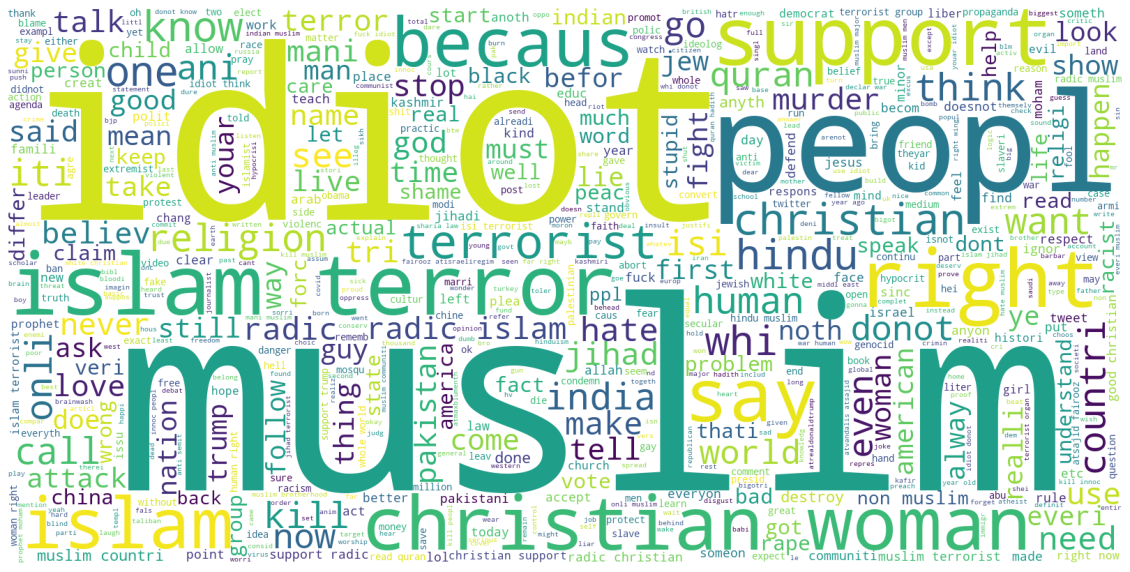

In [18]:
# for religion
cloudWord('religion')

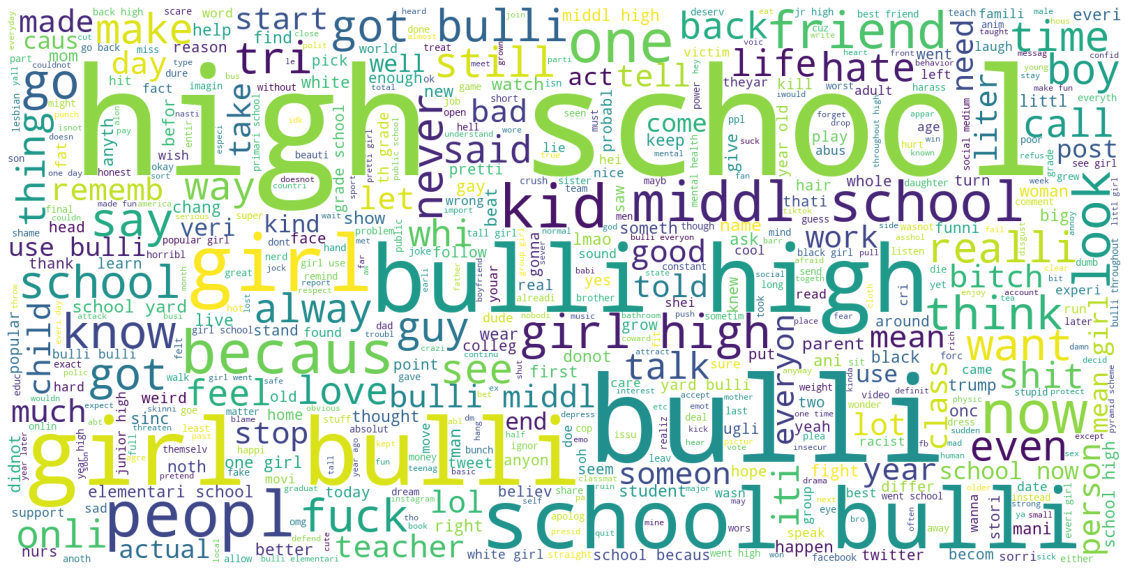

In [19]:
# for age
cloudWord('age')

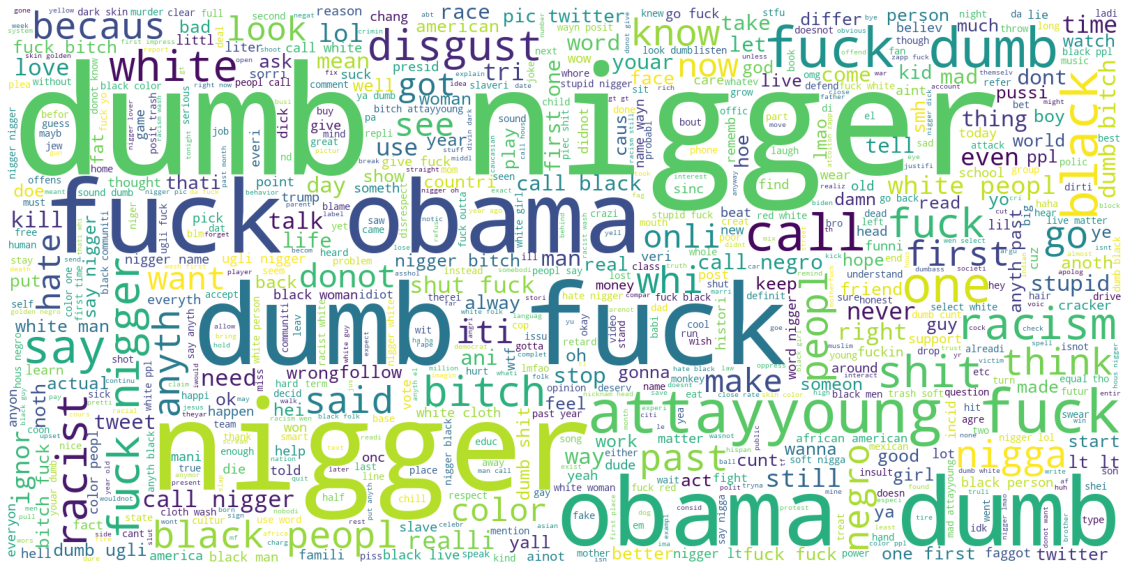

In [20]:
# for ethnicity
cloudWord('ethnicity')

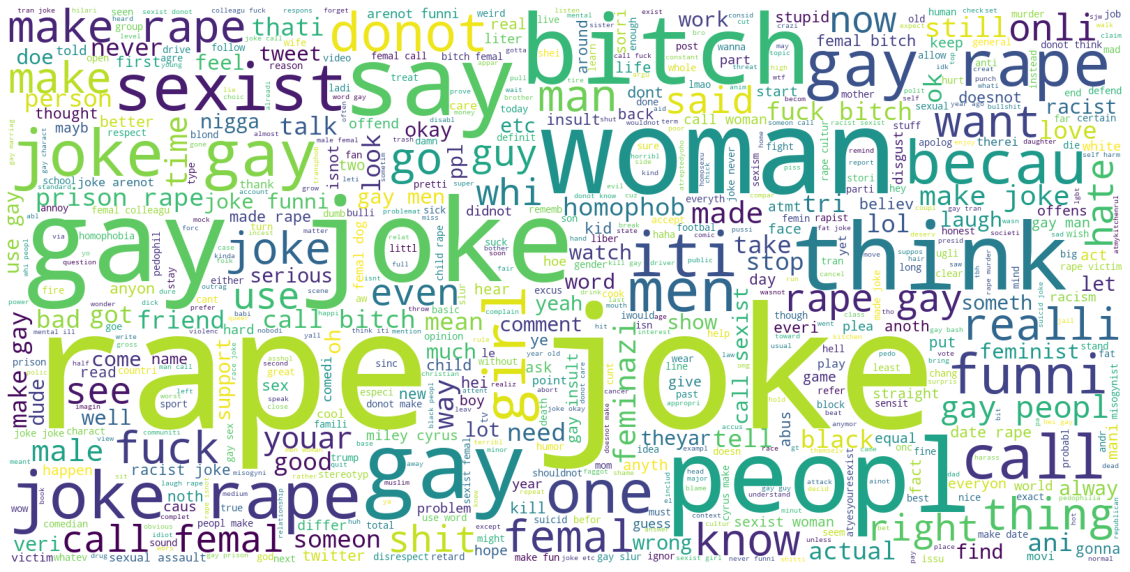

In [21]:
# for gender
cloudWord('gender')

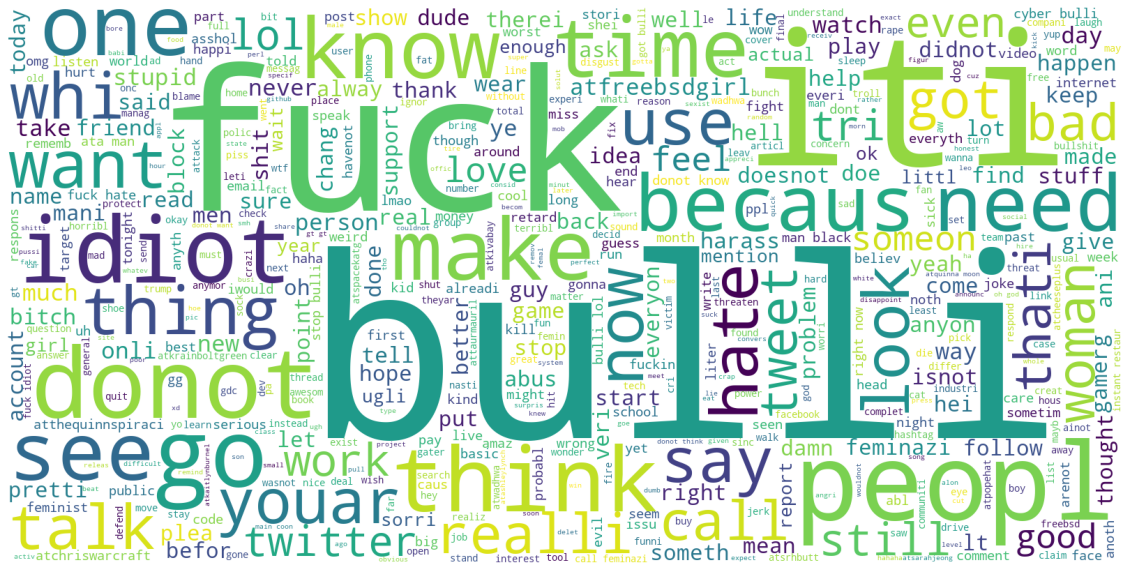

In [22]:
# for toher cyberbullying
cloudWord('other_cyberbullying')

Top words for each cyberbullying type!

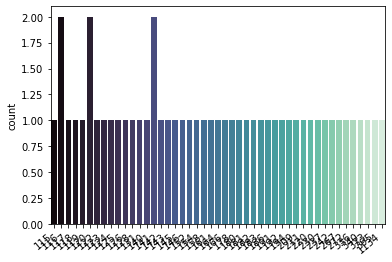

<Figure size 1440x2160 with 0 Axes>

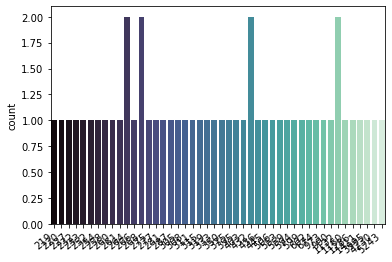

<Figure size 1440x2160 with 0 Axes>

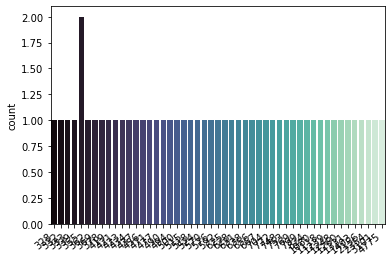

<Figure size 1440x2160 with 0 Axes>

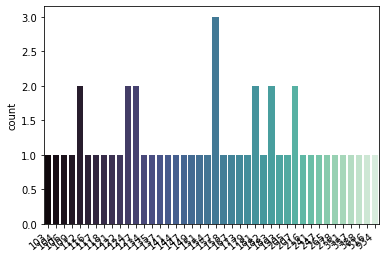

<Figure size 1440x2160 with 0 Axes>

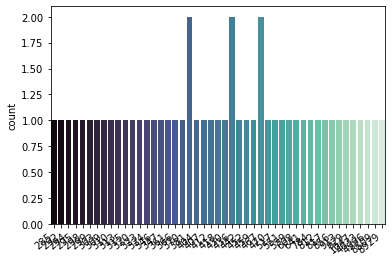

<Figure size 1440x2160 with 0 Axes>

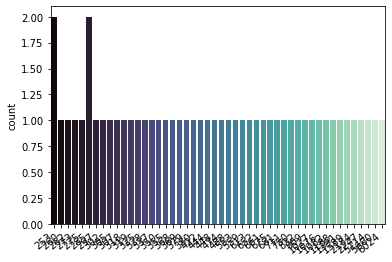

<Figure size 1440x2160 with 0 Axes>

In [33]:
for cyber_type in df.sentiment.unique():
  top_50 = df.clean_text[df.sentiment == cyber_type].str.split(expand = True).stack().value_counts()[:50]

  axes = sns.countplot(x = top_50.values, data = top_50, palette = 'mako')
  plt.figure(figsize=(20, 30)) 
  axes.set_xticklabels(axes.get_xticklabels(), rotation = 40, ha = "right")
  plt.tight_layout()
  plt.show()

In [34]:
ENCODE_DICT = {'not_cyberbullying': 0,
               'religion': 1,
               'age': 2,
               'ethnicity': 3,
               'gender': 4,
               'other_cyberbullying': 5
             }
df['sentiment'] = df.sentiment.replace(ENCODE_DICT)
print(df.sentiment.unique())
df.sample(10)

[0 4 1 5 2 3]


text  sentiment  \
25475  waiting for one of them to trip down the stairs            5   
36151  a girl who used to bully me in high school mad...          2   
36347  this oml  i would get bullied in high school f...          2   
16875    a    years old   woman   died in     after  ...          1   
45437  atdrfathm atcarbbyfx i will fuck right off fag...          3   
20485  wow but i think aya sophia was a christian wom...          1   
14138  like  that's a wink and nod prison rape joke w...          4   
26315  atmaxmoefoe you should have made h o delirious...          5   
6703     not sure if anyone noticed but kat and andre...          0   
15521  atshaunnagh just saw your tweet on  !! these b...          4   

                                              clean_text  
25475                                wait one trip stair  
36151  girl use bulli high school made status bulli s...  
36347  oml bulli high school communist cat girl despi...  
16875  year old woman die pour kerosen bodi set fire ...  
45437  atdrfathm atcarbbyfx fuck right fag got better...  
20485         wow think aya sophia christian woman right  
14138  thati wink nod prison rape joke ad kicker they...  
26315  atmaxmoefo made h deliri wheelchair consid retard  
6703   sure anyon notic andr arenot ani promo iwould ...  
15521                     atshaunnagh saw tweet bimbo go